In [2]:
%load_ext autoreload
%autoreload 2

import traceback
from util import *
from myalgorithm import algorithm



In [3]:

problem_file = 'alg_test_problems_20240429/TEST_K100_1.json'
timelimit = 30

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'
    print(traceback.format_exc())


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

20
30
0
##########################
[Bundle(all_orders, CAR, [70, 69], [70, 69], 58, True), Bundle(all_orders, CAR, [54, 60], [60, 54], 36, True), Bundle(all_orders, CAR, [42, 66], [42, 66], 40, True), Bundle(all_orders, CAR, [71, 73], [71, 73], 50, True), Bundle(all_orders, CAR, [68, 78], [68, 78], 60, True), Bundle(all_orders, CAR, [53, 81], [53, 81], 71, True), Bundle(all_orders, CAR, [87, 75], [75, 87], 82, True), Bundle(all_orders, CAR, [34, 0], [0, 34], 67, True), Bundle(all_orders, CAR, [27, 80], [27, 80], 58, True), Bundle(all_orders, CAR, [51, 84], [51, 84], 44, True), Bundle(all_orders, CAR, [37, 79], [37, 79], 109, True), Bundle(all_orders, CAR, [36, 65], [36, 65], 60, True), Bundle(all_orders, CAR, [13, 16], [13, 16], 42, True), Bundle(all_orders, CAR, [77, 59], [77, 59], 64, True), Bundle(all_orders, CAR, [18, 30], [18, 30], 70, True), Bundle(all_orders, CAR, [26, 48], [26, 48], 44, True), Bundle(all_orders, CAR, [74, 57], [57, 74], 109, True), Bundle(all_orders, CAR, [43, 

{'total_cost': 502723.89999999997,
 'avg_cost': 5027.239,
 'num_drivers': 55,
 'total_dist': 277533,
 'feasible': True,
 'infeasibility': None,
 'bundles': [['CAR', [70, 69], [70, 69]],
  ['BIKE', [54, 60], [54, 60]],
  ['BIKE', [42, 66], [42, 66]],
  ['BIKE', [71, 73], [71, 73]],
  ['BIKE', [68, 78], [68, 78]],
  ['BIKE', [53, 81], [53, 81]],
  ['BIKE', [87, 75], [75, 87]],
  ['CAR', [34, 0], [0, 34]],
  ['CAR', [27, 80], [27, 80]],
  ['CAR', [51, 84], [51, 84]],
  ['CAR', [37, 79], [37, 79]],
  ['BIKE', [36, 65], [36, 65]],
  ['CAR', [13, 16], [13, 16]],
  ['CAR', [77, 59], [77, 59]],
  ['CAR', [18, 30], [18, 30]],
  ['CAR', [26, 48], [26, 48]],
  ['CAR', [74, 57], [57, 74]],
  ['CAR', [43, 21], [43, 21]],
  ['CAR', [14, 32], [14, 32]],
  ['CAR', [6, 28], [6, 28]],
  ['BIKE', [41, 11], [41, 11]],
  ['CAR', [20, 39], [20, 39]],
  ['CAR', [94, 95], [94, 95]],
  ['BIKE', [35, 83], [35, 83]],
  ['CAR', [56, 82], [56, 82]],
  ['BIKE', [99, 93], [99, 93]],
  ['CAR', [67, 58], [67, 58]],
  

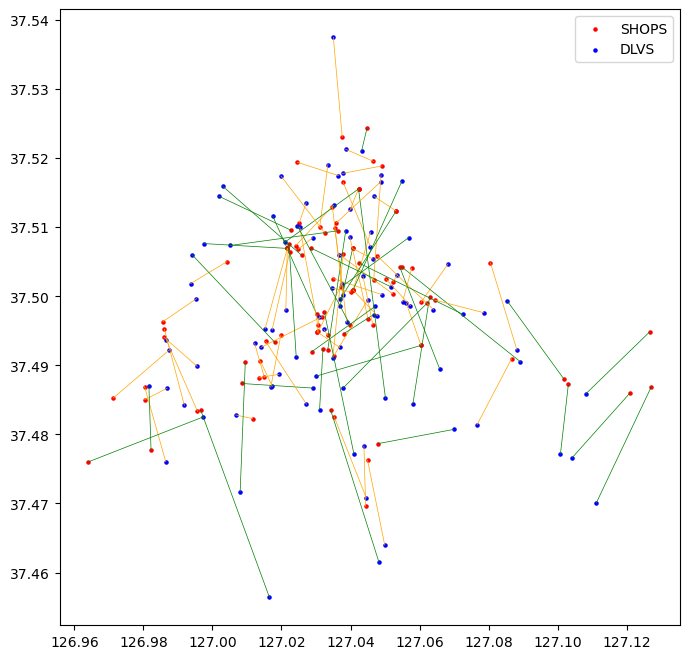

In [11]:
draw_route_solution(ALL_ORDERS, checked_solution)

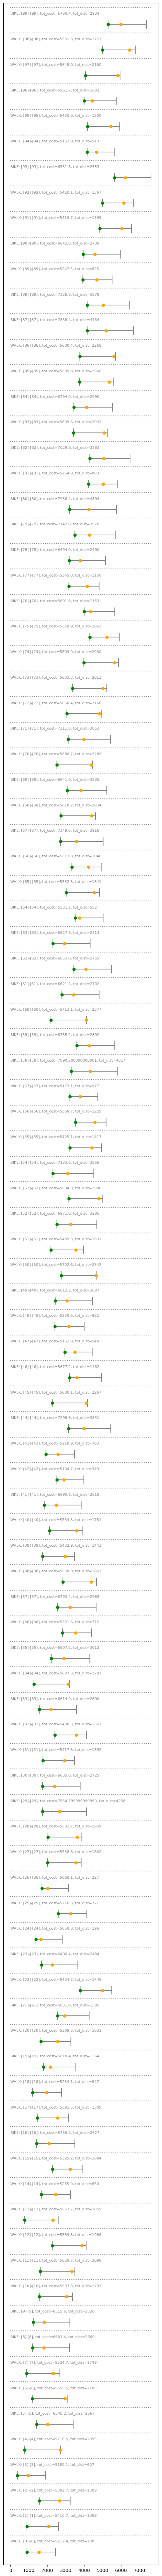

In [8]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)